# Tarea: Redes Barabasi - ALbert
## Tópicos selectos de Ciencia de Datos
### Luis David Huante

1. Construye una función (con tus propias manos) que permita crear grafos siguiendo el modelo propuesto por Barabasi & Albert. Recuerda que, en este modelo, partimos de una red conexa que contiene n_0 nodos. En cada iteración (hasta que alcanzas n nodos) agregas un nodo a la vez, seleccionando k de los nodos existentes y haciéndolo con una probabilidad proporcional al número de conexiones en la red. Formalmente, la probabilidad pi de que un nuevo nodo se conecte al nodo i está dada por:

$$
p_i = \frac{d_i}{\sum_{j} d_j}
$$

en donde di es el grado del nodo i y la suma que aparece en el denominador se hace sobre el grado de todos los nodos existentes.

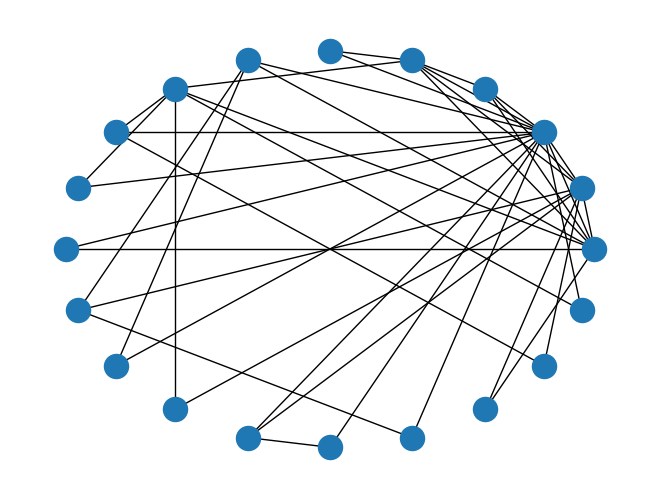

In [ ]:
import networkx as nx
import random

def barabasi_albert_graph(n, n_0, k):
    # Creamos una red de n_0 nodos
    G = nx.complete_graph(n_0)

    # Comenzamos a añadir nodos
    for new_node in range(n_0, n):
        # Calculamos la suma de los grados de los nodos
        total_degree = sum(dict(G.degree()).values())

        # Guardamos los nodos en un conjunto para conectarlos con base en su grado
        targets = set()

        # Repetimos hasta seleccionar k nodos
        while len(targets) < k:
            for node, degree in G.degree():
                if len(targets) >= k:
                    break
                # Añadimos un nodo con una probabilidad proporcional a sus conexiones
                if random.random() < degree / total_degree:
                    targets.add(node)

        # Añadimos los vértices
        G.add_edges_from([(new_node, target) for target in targets])

    return G

# Ejemplo
barabasi_albert_graph_example = barabasi_albert_graph(n=20, n_0=5, k=2)
nx.draw_circular(barabasi_albert_graph_example)

2. Utiliza tu código para generar redes con n = 2000 y n0 = 3 y k = 1, y con
n = 2000, n0 = 5 y k = 2.

In [ ]:
# Primera red con n = 2000, n_0 = 3, and k = 1
network1 = barabasi_albert_graph(n=2000, n_0=3, k=1)

# Segunda red con n = 2000, n_0 = 5, and k = 2
network2 = barabasi_albert_graph(n=2000, n_0=5, k=2)

# Verificamos el número de nodos y vértices
network1_info = (network1.number_of_nodes(), network1.number_of_edges())
network2_info = (network2.number_of_nodes(), network2.number_of_edges())

network1_info, network2_info

((2000, 2000), (2000, 4000))

3. Grafica las redes del punto anterior usando escala lineal y escala logarítmica. Ajusta una ley de potencias y determina el parámetro α que mejor ajusta lo datos si p(d) = d^{−α.}

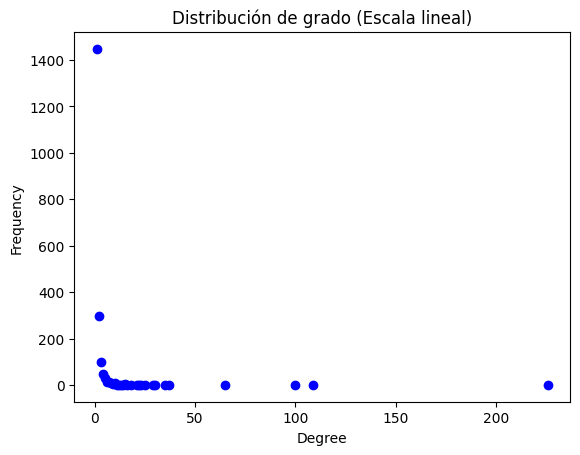

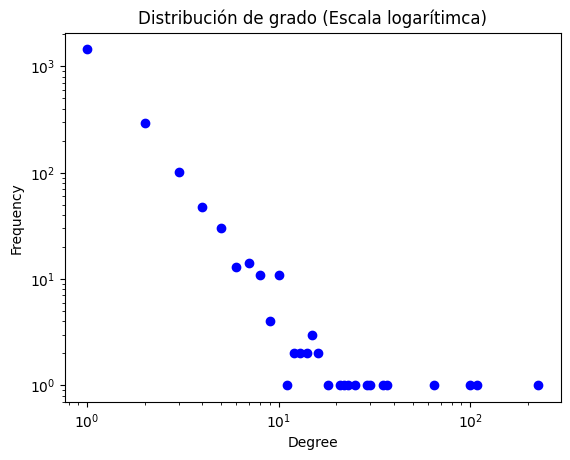

Parámetro alpha que mejor ajusta los datos: 1.408390892064405


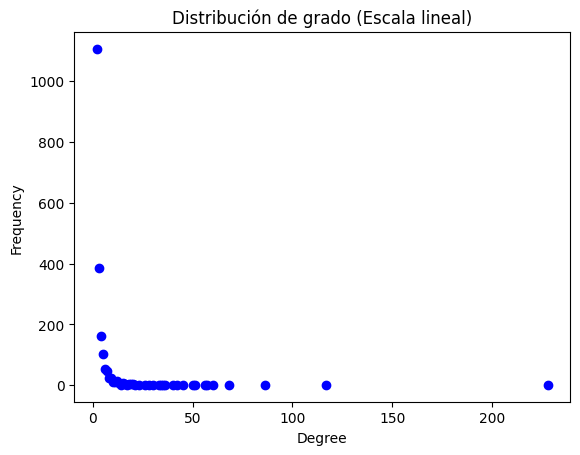

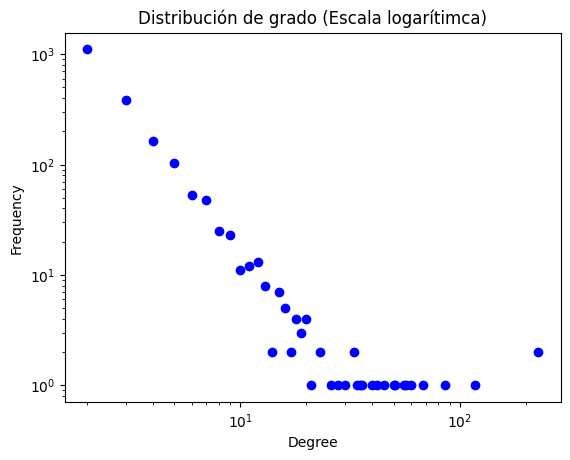

Parámetro alpha que mejor ajusta los datos: 1.6397370820521977


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.optimize import curve_fit

def plot_degree_distribution(G, scale_type, title):
    degree_count = Counter(G.degree(n) for n in G.nodes())
    deg, cnt = zip(*degree_count.items())

    plt.scatter(deg, cnt, color='b')

    if scale_type == 'log':
        plt.xscale('log')
        plt.yscale('log')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

def fit_power_law(degrees):
    deg, cnt = zip(*Counter(degrees).items())
    params, _ = curve_fit(lambda x, a, b: a + b * x, np.log(deg), np.log(cnt))
    return -params[1]

for net in [network1, network2]:
    plot_degree_distribution(net, 'linear', f'Distribución de grado (Escala lineal)')
    plot_degree_distribution(net, 'log', f'Distribución de grado (Escala logarítimca)')
    alpha = fit_power_law([net.degree(n) for n in net.nodes()])
    print(f"Parámetro alpha que mejor ajusta los datos: {alpha}")


4. En el archivo adivinaQuien.zip encontrarás 5 redes. Para cada una de ellas
elige una de las siguientes opciones:
* Se generó usando un modelo Erd ̈os-Renyi
* Se generó usando un modelo Watts-Strogatz
* Se generó usando un modelo Barabasi-Albert
* No corresponde a un modelo, corresponde a una red de la vida real

En cada caso, justifica ampliamente tu respuesta mediante indicadores y una descripción generosa del análisis y el razonamiento que seguiste en cada caso.

In [ ]:
# Cargamos las redes
file_paths = [
    "misterio1.edges",
    "misterio3.edges",
    "misterio4.edges",
    "misterio5.edges"
]

networks = []
for path in file_paths:
    G = nx.read_edgelist(path, nodetype=int)
    networks.append(G)

In [ ]:
def analyze_network(G):
    # Distribución de grado
    deg, cnt = zip(*Counter(G.degree(n) for n in G.nodes()).items())

    # Coeficiente de Clustering
    clustering_coefficient = nx.average_clustering(G)

    # Average Shortest Path Length
    avg_shortest_path_length = nx.average_shortest_path_length(G) if nx.is_connected(G) else None

    return {
        "degree_distribution": (deg, cnt),
        "clustering_coefficient": clustering_coefficient,
        "average_shortest_path_length": avg_shortest_path_length
    }

In [ ]:
network_analyses = [analyze_network(G) for G in networks]

### Análisis de red 1

In [ ]:
print(network_analyses[0])  # Propiedades de la primera red


{'degree_distribution': ((56, 34, 68, 40, 11, 33, 31, 29, 37, 22, 19, 23, 16, 13, 7, 17, 18, 10, 8, 14, 15, 9, 6, 5, 2, 73, 45, 55, 21, 30, 12, 20, 38, 24), (1, 1, 1, 3, 15, 1, 2, 1, 1, 4, 4, 2, 3, 11, 52, 3, 3, 12, 25, 7, 2, 26, 63, 108, 1, 1, 1, 2, 2, 3, 12, 3, 2, 1)), 'clustering_coefficient': 0.08910669381532609, 'average_shortest_path_length': 2.6751825327023218}


**Coeficiente de clustering**: 0.089

**Camino promedio más corto**:  2.67


Conclusión para la red 1: Un coeficiente de clustering bajo y una longitud promedio del camino más corto relativamente pequeña, que no coinciden con las características de los modelos de Erdős-Rényi (donde el clustering es generalmente bajo) o de Watts-Strogatz (donde hay un alto clustering y caminos cortos), pueden indicar una red de la vida real.

### Análisis de red 2

In [ ]:
print(network_analyses[1])

{'degree_distribution': ((5, 4, 2, 3, 7, 6), (74, 199, 17, 74, 4, 11)), 'clustering_coefficient': 0.2786154039452189, 'average_shortest_path_length': 5.727324761625553}


**Coeficiente de clustering**: 0.27

**Camino promedio más corto**: 5.7




Conclusión para la red 2:
Dado el coeficiente de clustering y la longitud promedio del camino más corto, esta red podría corresponder a un modelo de Watts-Strogatz, que se caracteriza por agrupación local y caminos relativamente cortos entre nodos.


### Análisis de red 3

In [ ]:
print(network_analyses[2])

{'degree_distribution': ((8, 4, 7, 12, 9, 6, 14, 5, 2, 10, 3, 11, 1), (34, 57, 50, 5, 33, 50, 1, 74, 17, 9, 39, 5, 5)), 'clustering_coefficient': 0.012116452881624384, 'average_shortest_path_length': 3.5725593667546174}


**Coeficiente de clustering**: 0.012

**Camino promedio más corto**:  3.5


Conclusión para la Red 3:
La Red 3, dadas sus características, podría ser una red de la vida real. La combinación de un bajo coeficiente de clustering y una longitud promedio del camino más corto moderada no se alinea con ninguno de los modelos comunes.

### Análisis de red 4

In [ ]:
print(network_analyses[3])

{'degree_distribution': ((9, 69, 25, 52, 15, 10, 4, 5, 3, 17, 42, 12, 6, 8, 14, 22, 20, 11, 7, 13, 43, 16, 26, 18), (10, 1, 2, 2, 5, 8, 78, 50, 154, 1, 1, 6, 17, 8, 6, 1, 2, 6, 12, 4, 1, 2, 1, 1)), 'clustering_coefficient': 0.07322898558617338, 'average_shortest_path_length': 3.0915944214097246}


**Coeficiente de clustering**: 0.073

**Camino promedio más corto**:  3.09


Conclusión para la Red 4:
La Red 4, dadas sus características, podría ser una red de la vida real. La combinación de un bajo coeficiente de clustering y una longitud promedio del camino más corto moderada no se alinea con ninguno de los modelos comunes.